In [1]:
from google.colab import files
upload=files.upload()

Saving SampleSubmission.csv to SampleSubmission.csv
Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [111]:
##import libraries
!pip install catboost

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots


from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter

from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os


     |████████████████████████████████| 66.1MB 59kB/s 


In [95]:
Train=pd.read_csv('Train.csv')
Test=pd.read_csv('Test.csv')
sample=pd.read_csv('SampleSubmission.csv')

In [131]:
submission=pd.read_csv('SampleSubmission.csv')

In [96]:
def_obj={'default_status':{'yes':1,'no':0}}
Train.replace(def_obj,inplace=True)
Test.sample()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
9111,Apcnt_1120988,NaN,0.41305,0.3566,0.0,0.0,NaN,NaN,NaN,NaN,0.0,43957.0,NaN,NaN,96375139,37554060.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,729.0,NaN,NaN,NaN,NaN,0.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,2.2,0.0,NaN,NaN,NaN,charge,NaN,0.0,NaN


In [97]:
##transforming features
df_abj={"form_field47":{"charge":0,"lending":1}}
Train.replace(df_abj,inplace=True)
Test.replace(df_abj,inplace=True)

In [98]:
#useless=['Applicant_ID']
#train.drop(columns=(i for i in useless),inplace=True)
#test.drop(columns=(i for i in useless), inplace=True)

In [99]:

minus_999999 = Train.select_dtypes(float)

for col in minus_999999:
    Train[col].fillna(-999, inplace=True)
    Test[col].fillna(-999, inplace=True)

In [100]:

def lgb_predict(estimator,train,label,test,estimator_name):
    mean_train = []
    mean_test_val = []
    test_pred = np.zeros(test.shape[0])
    val_pred = np.zeros(train.shape[0])
    for count, (train_index,test_index) in enumerate(skf.split(train,label)):
        x_train,x_test = train.iloc[train_index],train.iloc[test_index]
        y_train,y_test = label.iloc[train_index],label.iloc[test_index]
        print(f'========================Fold{count +1}==========================')
        estimator.fit(x_train,y_train,eval_set=[(x_test,y_test)],early_stopping_rounds=200,
                               verbose=250)
        train_predict = estimator.predict_proba(x_train, num_iteration = estimator.best_iteration_)[:,1]
        test_predict = estimator.predict_proba(x_test, num_iteration = estimator.best_iteration_)[:,1]
        val_pred[test_index] = test_predict
        test_pred+= estimator.predict_proba(test, num_iteration = estimator.best_iteration_)[:,1]
        
        print('\nValidation scores', roc_auc_score(y_test,test_predict))
        print('\nTraining scores', roc_auc_score(y_train,train_predict))
        mean_train.append(roc_auc_score(y_train, train_predict))
        mean_test_val.append(roc_auc_score(y_test,test_predict))
    print('Average Testing ROC score for 10 folds split:',np.mean(mean_test_val))
    print('Average Training ROC score for 10 folds split:',np.mean(mean_train))
    print('standard Deviation for 10 folds split:',np.std(mean_test_val))
    return val_pred, test_pred, estimator_name


def xgb_predict(estimator,train,label,test,estimator_name):
    mean_train = []
    mean_test_val = []
    test_pred = np.zeros(test.shape[0])
    val_pred = np.zeros(train.shape[0])
    for count, (train_index,test_index) in enumerate(skf.split(train,label)):
        x_train,x_test = train.iloc[train_index],train.iloc[test_index]
        y_train,y_test = label.iloc[train_index],label.iloc[test_index]
        print(f'========================Fold{count +1}==========================')
        estimator.fit(x_train, y_train, early_stopping_rounds = 200, eval_metric="auc",
                           eval_set=[(x_test, y_test)],verbose=250)
        train_predict = estimator.predict_proba(x_train, ntree_limit = estimator.get_booster().best_ntree_limit)[:,1]
        test_predict = estimator.predict_proba(x_test, ntree_limit = estimator.get_booster().best_ntree_limit)[:,1]
        val_pred[test_index] = test_predict
        test_pred+= estimator.predict_proba(test, ntree_limit = estimator.get_booster().best_ntree_limit)[:,1]
        
        print('\nTesting scores', roc_auc_score(y_test,test_predict))
        print('\nTraining scores', roc_auc_score(y_train,train_predict))
        mean_train.append(roc_auc_score(y_train, train_predict))
        mean_test_val.append(roc_auc_score(y_test,test_predict))
    print('Average Testing ROC score for 10 folds split:',np.mean(mean_test_val))
    print('Average Training ROC score for 10 folds split:',np.mean(mean_train))
    print('standard Deviation for 10 folds split:',np.std(mean_test_val))
    return val_pred, test_pred, estimator_name

def cat_predict(estimator,train,label,test,estimator_name):
    mean_train = []
    mean_test_val = []
    test_pred = np.zeros(test.shape[0])
    val_pred = np.zeros(train.shape[0])
    for count, (train_index,test_index) in enumerate(skf.split(train,label)):
        x_train,x_test = train.iloc[train_index],train.iloc[test_index]
        y_train,y_test = label.iloc[train_index],label.iloc[test_index]
        print(f'========================Fold{count +1}==========================')
        estimator.fit(x_train,y_train,eval_set=[(x_test,y_test)],early_stopping_rounds=200,
                           verbose=250,use_best_model=True)
        train_predict = estimator.predict_proba(x_train)[:,1]
        test_predict = estimator.predict_proba(x_test)[:,1]
        val_pred[test_index] = test_predict
        test_pred+= estimator.predict_proba(test)[:,1]
        
        print('\nTesting scores', roc_auc_score(y_test,test_predict))
        print('\nTraining scores', roc_auc_score(y_train,train_predict))
        mean_train.append(roc_auc_score(y_train, train_predict))
        mean_test_val.append(roc_auc_score(y_test,test_predict))
    print('Average Testing ROC score for 10 folds split:',np.mean(mean_test_val))
    print('Average Training ROC score for 10 folds split:',np.mean(mean_train))
    print('standard Deviation for 10 folds split:',np.std(mean_test_val))
    return val_pred, test_pred, estimator_name


def model_predict(estimator,train,label,test, estimator_name):
    mean_train = []
    mean_test_val = []
    test_pred = np.zeros(test.shape[0])
    val_pred = np.zeros(train.shape[0])
    for count, (train_index,test_index) in enumerate(skf.split(train,label)):
        x_train,x_test = train.iloc[train_index],train.iloc[test_index]
        y_train,y_test = label.iloc[train_index],label.iloc[test_index]
        print(f'========================Fold{count +1}==========================')
        estimator.fit(x_train, y_train)
        train_predict = estimator.predict_proba(x_train)[:,1]
        test_predict = estimator.predict_proba(x_test)[:,1]
        val_pred[test_index] = test_predict
        test_pred+= estimator.predict_proba(test)[:,1]
        
        print('\nValidation scores', roc_auc_score(y_test,test_predict))
        print('\nTraining scores', roc_auc_score(y_train,train_predict))
        mean_train.append(roc_auc_score(y_train, train_predict))
        mean_test_val.append(roc_auc_score(y_test,test_predict))
    print('Average Testing ROC score for 10 folds split:',np.mean(mean_test_val))
    print('Average Training ROC score for 10 folds split:',np.mean(mean_train))
    print('standard Deviation for 10 folds split:',np.std(mean_test_val))
    return val_pred, test_pred, estimator_name
        
def Stack(meta_estimator,Train_stack,Test_stack,target,file_name):
    
    prediction = meta_estimator.fit(Train_stack, target).predict(Test_stack)
    submission['default_status'] = prediction
    #LB: 0.845389667
    submission.to_csv(file_name,index=False)

In [101]:

#percentage of missing values each feature has..
miss_percentage = Train.isnull().sum()/Train.shape[0]
miss_percentage

Applicant_ID      0.0
form_field1       0.0
form_field2       0.0
form_field3       0.0
form_field4       0.0
form_field5       0.0
form_field6       0.0
form_field7       0.0
form_field8       0.0
form_field9       0.0
form_field10      0.0
form_field11      0.0
form_field12      0.0
form_field13      0.0
form_field14      0.0
form_field15      0.0
form_field16      0.0
form_field17      0.0
form_field18      0.0
form_field19      0.0
form_field20      0.0
form_field21      0.0
form_field22      0.0
form_field23      0.0
form_field24      0.0
form_field25      0.0
form_field26      0.0
form_field27      0.0
form_field28      0.0
form_field29      0.0
form_field30      0.0
form_field31      0.0
form_field32      0.0
form_field33      0.0
form_field34      0.0
form_field35      0.0
form_field36      0.0
form_field37      0.0
form_field38      0.0
form_field39      0.0
form_field40      0.0
form_field41      0.0
form_field42      0.0
form_field43      0.0
form_field44      0.0
form_field

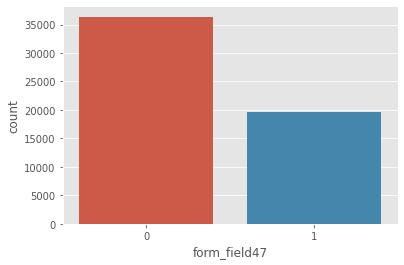

In [102]:
#countplot of form_field47 feature..
sns.countplot(x='form_field47',data=Train)

In [103]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
skf = StratifiedKFold(n_splits = 10,shuffle=True,random_state=199)

In [105]:
train = Train.drop(["Applicant_ID","default_status"],1)
target = Train["default_status"]

test = Test.drop(["Applicant_ID"],1)

In [107]:
target

0        0
1        0
2        1
3        0
4        0
        ..
55995    0
55996    1
55997    0
55998    0
55999    0
Name: default_status, Length: 56000, dtype: int64


MODEL 1: LIGHTGBM(1

In [108]:
import lightgbm as lgbm
lgb_model = lgbm.LGBMClassifier(random_state=34, n_estimators=5000,colsample_bytree=0.9,min_child_samples=10,
    subsample=0.7,subsample_freq=2,num_leaves=120,reg_lambda=2,reg_alpha=5 ,metric='auc', learning_rate=0.008,
    max_depth=5)
LGB1__train, LGB1_test, LGB1_name =lgb_predict(lgb_model,train, target, test,'lightgbm(1)')

========================Fold1==========================
Training until validation scores don't improve for 200 rounds.
[250]	valid_0's auc: 0.826855
[500]	valid_0's auc: 0.83038
[750]	valid_0's auc: 0.832541
[1000]	valid_0's auc: 0.833442
[1250]	valid_0's auc: 0.833827
[1500]	valid_0's auc: 0.834195
[1750]	valid_0's auc: 0.834427
[2000]	valid_0's auc: 0.834587
Early stopping, best iteration is:
[2049]	valid_0's auc: 0.834657

Validation scores 0.8346566438293199

Training scores 0.8808643431939369
========================Fold2==========================
Training until validation scores don't improve for 200 rounds.
[250]	valid_0's auc: 0.829021
[500]	valid_0's auc: 0.833273
[750]	valid_0's auc: 0.835423
[1000]	valid_0's auc: 0.836568
[1250]	valid_0's auc: 0.837
[1500]	valid_0's auc: 0.837063
[1750]	valid_0's auc: 0.837262
[2000]	valid_0's auc: 0.837115
Early stopping, best iteration is:
[1839]	valid_0's auc: 0.837296

Validation scores 0.8372961933673557

Training scores 0.8772709417311

In [112]:

catboost =  CatBoostClassifier(random_seed=34,use_best_model=True,
                          n_estimators=5000,silent=True,eval_metric='AUC')


cat1_train, cat1_test, cat1_name = cat_predict(catboost,train, target, test,  'catboost(1)')

========================Fold1==========================
Learning rate set to 0.041434
0:	test: 0.7957900	best: 0.7957900 (0)	total: 92.9ms	remaining: 7m 44s
250:	test: 0.8340078	best: 0.8340450 (239)	total: 9.77s	remaining: 3m 4s
500:	test: 0.8353024	best: 0.8354826 (488)	total: 19.3s	remaining: 2m 53s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8354826241
bestIteration = 488

Shrink model to first 489 iterations.

Testing scores 0.8354826241441169

Training scores 0.8697110849434153
========================Fold2==========================
Learning rate set to 0.041434
0:	test: 0.7994374	best: 0.7994374 (0)	total: 40.8ms	remaining: 3m 23s
250:	test: 0.8356598	best: 0.8356932 (249)	total: 9.75s	remaining: 3m 4s
500:	test: 0.8360313	best: 0.8364142 (419)	total: 19.4s	remaining: 2m 54s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8364141588
bestIteration = 419

Shrink model to first 420 iterations.

Testing scores 0.8364141588445175

Trainin

In [113]:
catboost2 =  CatBoostClassifier(random_seed=34,bootstrap_type='Bayesian',max_depth=6,learning_rate=0.007,
                          iterations=8000,silent=True,eval_metric='AUC')


cat2_train, cat2_test, cat2_name = cat_predict(catboost2,train, target, test,  'catboost(2)')

========================Fold1==========================
0:	test: 0.7935997	best: 0.7935997 (0)	total: 44.8ms	remaining: 5m 58s
250:	test: 0.8269805	best: 0.8269866 (249)	total: 10.5s	remaining: 5m 24s
500:	test: 0.8299941	best: 0.8299941 (500)	total: 20.6s	remaining: 5m 8s
750:	test: 0.8318196	best: 0.8318275 (749)	total: 30.6s	remaining: 4m 55s
1000:	test: 0.8328814	best: 0.8328814 (1000)	total: 40.7s	remaining: 4m 44s
1250:	test: 0.8335839	best: 0.8335882 (1248)	total: 50.7s	remaining: 4m 33s
1500:	test: 0.8341689	best: 0.8341775 (1497)	total: 1m	remaining: 4m 22s
1750:	test: 0.8346668	best: 0.8346754 (1743)	total: 1m 10s	remaining: 4m 12s
2000:	test: 0.8350204	best: 0.8350204 (2000)	total: 1m 20s	remaining: 4m 1s
2250:	test: 0.8352641	best: 0.8352686 (2247)	total: 1m 30s	remaining: 3m 51s
2500:	test: 0.8353583	best: 0.8353660 (2496)	total: 1m 40s	remaining: 3m 41s
2750:	test: 0.8355620	best: 0.8355690 (2744)	total: 1m 50s	remaining: 3m 31s
3000:	test: 0.8356941	best: 0.8357022 (2998

In [115]:
lgb_model2 = lgbm.LGBMClassifier(random_state=34, n_estimators=5000,colsample_bytree=0.9,min_child_samples=10,
    subsample=0.5,subsample_freq=2,num_leaves=120,reg_lambda=2,reg_alpha=5 ,metric='auc', learning_rate=0.008,
    max_depth=5)
LGBM2_train, LGBM2_test, LGBM2_name= lgb_predict(lgb_model2,train, target, test,  'lightgbm(2)')

========================Fold1==========================
Training until validation scores don't improve for 200 rounds.
[250]	valid_0's auc: 0.82715
[500]	valid_0's auc: 0.830862
[750]	valid_0's auc: 0.832696
[1000]	valid_0's auc: 0.833995
[1250]	valid_0's auc: 0.834481
[1500]	valid_0's auc: 0.834828
[1750]	valid_0's auc: 0.834679
Early stopping, best iteration is:
[1645]	valid_0's auc: 0.834995

Validation scores 0.8349952112458885

Training scores 0.8730757456589879
========================Fold2==========================
Training until validation scores don't improve for 200 rounds.
[250]	valid_0's auc: 0.828919
[500]	valid_0's auc: 0.833386
[750]	valid_0's auc: 0.835457
[1000]	valid_0's auc: 0.83677
[1250]	valid_0's auc: 0.837293
Early stopping, best iteration is:
[1229]	valid_0's auc: 0.837365

Validation scores 0.8373651831618677

Training scores 0.8655728100952569
========================Fold3==========================
Training until validation scores don't improve for 200 rounds.

In [116]:
rf1_model = RandomForestClassifier(n_jobs=-1,criterion='entropy',min_samples_split=10,n_estimators=400,random_state=99)
rf1_train, rf1_test, rf1_name = model_predict(rf1_model,train, target, test, 'RandomForest(1)')

========================Fold1==========================

Validation scores 0.8326918144816133

Training scores 0.999510979215267
========================Fold2==========================

Validation scores 0.831090820062715

Training scores 0.9995283475380485
========================Fold3==========================

Validation scores 0.8359976329601503

Training scores 0.9995166097108862
========================Fold4==========================

Validation scores 0.8439814769300715

Training scores 0.9995070442545291
========================Fold5==========================

Validation scores 0.8358337821981839

Training scores 0.9995220741654247
========================Fold6==========================

Validation scores 0.8438519684127197

Training scores 0.9995042444456393
========================Fold7==========================

Validation scores 0.8312777029990263

Training scores 0.9995034163236398
========================Fold8==========================

Validation scores 0.83157076521648


In [117]:
##1
rf_model2 = RandomForestClassifier(max_depth=10,min_samples_split=10,min_samples_leaf=15,n_estimators=400,n_jobs=-1,random_state=34)
rf2_train, rf2_test, rf2_name= model_predict( rf_model2,train, target, test, 'RandomForest(2)')

========================Fold1==========================

Validation scores 0.8291415996560169

Training scores 0.8792683116234479
========================Fold2==========================

Validation scores 0.8307283649297966

Training scores 0.8793266378104867
========================Fold3==========================

Validation scores 0.8319137820740024

Training scores 0.8789293036332445
========================Fold4==========================

Validation scores 0.8394986925571568

Training scores 0.878407423744399
========================Fold5==========================

Validation scores 0.8309199840840544

Training scores 0.8791310126796122
========================Fold6==========================

Validation scores 0.8405991501885252

Training scores 0.8783770908278951
========================Fold7==========================

Validation scores 0.8242847213219657

Training scores 0.8791454305087054
========================Fold8==========================

Validation scores 0.82674834023351

In [118]:
##2
from xgboost import XGBClassifier
Xgboost = XGBClassifier(learning_rate=0.01,subsample=0.7,colsample_bytree=0.9,reg_alpha=10,
               n_jobs=-1,n_estimators=5000,max_depth= 5,random_state=34)

xgb_train, xgb_test, xgb_name= xgb_predict(Xgboost,train, target, test,'xgboost')

========================Fold1==========================
[0]	validation_0-auc:0.776544
Will train until validation_0-auc hasn't improved in 200 rounds.
[250]	validation_0-auc:0.827898
[500]	validation_0-auc:0.831153
[750]	validation_0-auc:0.833171
[1000]	validation_0-auc:0.834187
[1250]	validation_0-auc:0.834618
[1500]	validation_0-auc:0.834762
Stopping. Best iteration:
[1542]	validation_0-auc:0.834832


Testing scores 0.8348315329584083

Training scores 0.8739140136338971
========================Fold2==========================
[0]	validation_0-auc:0.785944
Will train until validation_0-auc hasn't improved in 200 rounds.
[250]	validation_0-auc:0.829721
[500]	validation_0-auc:0.834035
[750]	validation_0-auc:0.836192
[1000]	validation_0-auc:0.836979
[1250]	validation_0-auc:0.837319
Stopping. Best iteration:
[1207]	validation_0-auc:0.83735


Testing scores 0.8373496604581027

Training scores 0.8673865949637134
========================Fold3==========================
[0]	validation_0-auc:0.7

In [125]:
##3
from sklearn.ensemble import  GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(max_depth=4,min_samples_leaf=10,n_estimators=200,learning_rate=0.1,min_samples_split=10,random_state=10)
gbm_train, gbm_test, gbm_name= model_predict(gbm_model,train, target, test, 'Gbm')

========================Fold1==========================

Validation scores 0.8330386606735234

Training scores 0.8707550341782366
========================Fold2==========================

Validation scores 0.8353132541985895

Training scores 0.8712694390253557
========================Fold3==========================

Validation scores 0.8405669132879346

Training scores 0.8695435069184125
========================Fold4==========================

Validation scores 0.8462846149826173

Training scores 0.8696511409202062
========================Fold5==========================

Validation scores 0.8387373039374717

Training scores 0.8703997754494486
========================Fold6==========================

Validation scores 0.8454609661813096

Training scores 0.8704792295815413
========================Fold7==========================

Validation scores 0.8329771190811774

Training scores 0.8706396925886813
========================Fold8==========================

Validation scores 0.8313357120791

In [124]:
##STACKING

In [126]:
Train_stack3 = pd.DataFrame(xgb_train)
Train_stack3 = pd.concat([Train_stack3,pd.DataFrame(rf1_train),pd.DataFrame(rf2_train),
                        pd.DataFrame(LGB1__train),pd.DataFrame(LGBM2_train),pd.DataFrame(cat1_train),pd.DataFrame(cat2_train),
                         pd.DataFrame(gbm_train)],1)
Test_stack3 = pd.DataFrame(xgb_test)
Test_stack3 = pd.concat([Test_stack3,pd.DataFrame(rf1_test),pd.DataFrame(rf2_test),
                        pd.DataFrame(LGB1_test),pd.DataFrame(LGBM2_test),pd.DataFrame(cat1_test),pd.DataFrame(cat2_test),
                        pd.DataFrame(gbm_test)],1)
Test_stack3.columns=[xgb_name,rf1_name,rf2_name,LGB1_name,LGBM2_name,cat1_name,cat2_name,gbm_name]
Train_stack3.columns=[xgb_name,rf1_name,rf2_name,LGB1_name,LGBM2_name,cat1_name,cat2_name,gbm_name]
Test_stack3 = Test_stack3/10 #average predictions for 1o folds on the Test set..
Test_stack3.head()

,xgboost,RandomForest(1),RandomForest(2),lightgbm(1),lightgbm(2),catboost(1),catboost(2),Gbm
0,0.298412,0.348726,0.369491,0.303370,0.302246,0.305407,0.312501,0.353062
1,0.344080,0.373134,0.381312,0.359435,0.372995,0.363210,0.362095,0.338744
2,0.405299,0.392137,0.374125,0.406959,0.405959,0.390146,0.384402,0.414784
3,0.764874,0.664389,0.637773,0.753831,0.761280,0.734621,0.740145,0.738248
4,0.120587,0.201943,0.221903,0.123735,0.132495,0.182021,0.183500,0.190475


In [132]:
from sklearn.linear_model import  LinearRegression, Ridge
meta_estimator = LinearRegression()
Stack(meta_estimator,Train_stack3,Test_stack3,target,'lova_stack.csv')

In [133]:
files.download('lova_stack.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [129]:
#CORRELATION BETWEEN PREDICTIONS..
Train_stack3.corr()

,xgboost,RandomForest(1),RandomForest(2),lightgbm(1),lightgbm(2),catboost(1),catboost(2),Gbm
xgboost,1.000000,0.969205,0.963207,0.997666,0.997642,0.988064,0.992101,0.986445
RandomForest(1),0.969205,1.000000,0.984577,0.969879,0.970833,0.966624,0.971243,0.961314
RandomForest(2),0.963207,0.984577,1.000000,0.964049,0.965693,0.962241,0.967150,0.958166
lightgbm(1),0.997666,0.969879,0.964049,1.000000,0.997729,0.988674,0.992826,0.987508
lightgbm(2),0.997642,0.970833,0.965693,0.997729,1.000000,0.988958,0.993223,0.986381
catboost(1),0.988064,0.966624,0.962241,0.988674,0.988958,1.000000,0.994312,0.983809
catboost(2),0.992101,0.971243,0.967150,0.992826,0.993223,0.994312,1.000000,0.986838
Gbm,0.986445,0.961314,0.958166,0.987508,0.986381,0.983809,0.986838,1.000000


In [ ]:
ad.score(xtst,ytst)

0.7424107142857143

In [ ]:
ad.score(xtr,ytr)

0.9999627976190476

In [ ]:
# Voting Classifier - Multiple model ensemble
from sklearn.svm import SVC
lr = LogisticRegression()
tree = DecisionTreeClassifier()
svm = SVC(kernel='poly',degree=2)

In [ ]:
evc = VotingClassifier( estimators= [('lr',lr),('tree',tree),('svm',svm)], voting = 'hard')

In [ ]:
evc.fit(xtr.iloc[1:4000],ytr.iloc[1:4000])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('tree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini...
                                        

In [ ]:
evc.score(xtst,ytst)

0.7790178571428571

In [ ]:
%%capture
#In the real sense we want to see how the model's doing but I did this to avoid long training lines on github
#!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
errcb1=[]
y_pred_totcb1=[]
fold=KFold(n_splits=25)#25
i=1
for train_index, test_index in fold.split(train,y):
    print(str(i) + ' iter')
    
    m1  = CatBoostClassifier(n_estimators=1000,eval_metric='Logloss',random_seed= 10, use_best_model=True)
    m1.fit(xtr,ytr,eval_set=[(xtr,ytr),(xtst, ytst)], early_stopping_rounds=100,verbose=100)
    preds=m1.predict_proba(xtst)[:,1]
    print("err: ",log_loss(ytst,preds))
    errcb1.append((log_loss(ytst,preds)))
    p1 = m1.predict_proba(test)[:,1]
    y_pred_totcb1.append(p1)
    i+=1
np.mean(errcb1)

In [ ]:
m3.score(xtr,ytr)

0.8224516369047619

In [ ]:
#In the real sense we want to see how the model's doing but I did this to avoid long training lines on github
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
errcb3=[]
y_pred_totcb3=[]
fold=KFold(n_splits=25)#25
i=1
for train_index, test_index in fold.split(train,y):
    print(str(i) + ' iter')
    #X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    #y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m3  = lgb.LGBMClassifier(n_estimators=1000,random_seed = 10, use_best_model=True, eval_metric = 'logloss')
    m3.fit(xtr, ytr, eval_metric = 'auc',
                  eval_set = [(xtr, ytr), (xtst, ytst)],
                  eval_names = ['valid', 'train'],
                  early_stopping_rounds = 100, verbose = 200)
    preds=m3.predict_proba(xtst)[:,1]
    print("err: ",log_loss(ytst,preds))
    errcb3.append((log_loss(ytst,preds)))
    p3 = m3.predict_proba(test)[:,1]
    y_pred_totcb3.append(p3)
    i+=1
np.mean(errcb3)

1 iter
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[79]	valid's binary_logloss: 0.382929	valid's auc: 0.865224	train's binary_logloss: 0.385837	train's auc: 0.844071
err:  0.3858373904304075
2 iter
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[79]	valid's binary_logloss: 0.382929	valid's auc: 0.865224	train's binary_logloss: 0.385837	train's auc: 0.844071
err:  0.3858373904304075
3 iter
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[79]	valid's binary_logloss: 0.382929	valid's auc: 0.865224	train's binary_logloss: 0.385837	train's auc: 0.844071
err:  0.3858373904304075
4 iter
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[79]	valid's binary_logloss: 0.382929	valid's auc: 0.865224	train's binary_logloss: 0.385837	train's auc: 0.844071
err:  0.3858373904304075
5 iter
Training unti

0.38583739043040743

In [ ]:
m3.score(X_train,y_train)

0.8246465773809524

In [ ]:
cat_sub = sample.copy()
cat_sub.default_status = np.mean(y_pred_totcb1, axis=0)
cat_sub.to_csv('001.csv', index = False)

In [ ]:
lgb_sub = sample.copy()
lgb_sub.default_status = np.mean(y_pred_totcb3, axis=0)
lgb_sub.to_csv('002.csv', index = False)

In [ ]:
blend = (lgb_sub.default_status*0.4) + (cat_sub.default_status*0.6)
blend_sub = sample.copy()
blend_sub.default_status = blend
blend_sub.to_csv('XGB_CAT.csv', index = False)

In [ ]:
reblend = ((lgb_sub.default_status*0.33) + (cat_sub.default_status*0.67))*0.95 + (cat_sub.default_status*0.05)
reblend_sub = sample.copy()
reblend_sub.default_status = reblend
reblend_sub.to_csv('XGB_CAT1.csv', index = False)

In [ ]:
files.download('XGB_CAT1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>